The initiate_lvalues is adapted in python from SecreC for better pictorial representation.
Following is the comparison between the values generated by the function and the library function from Python's numpy library

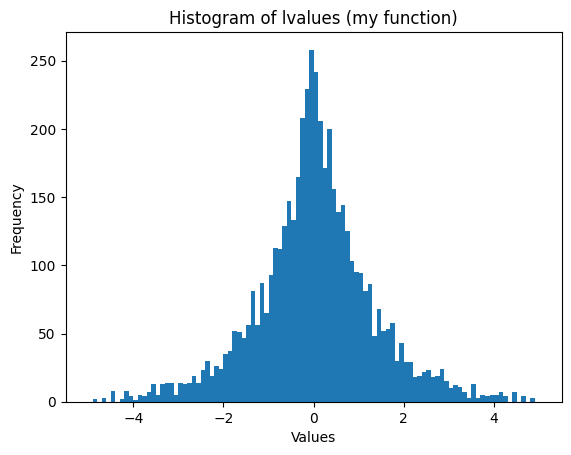

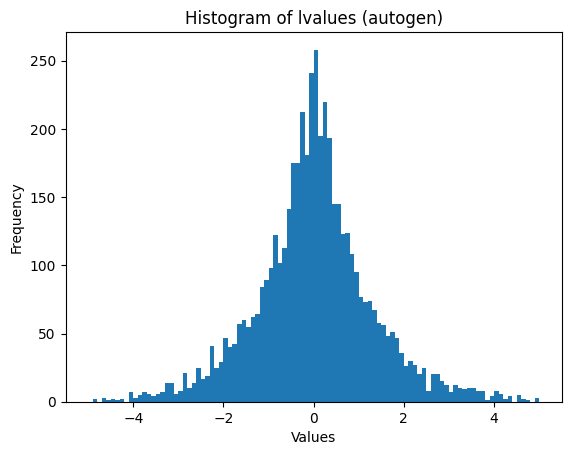

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def initiate_lvalues(L, s):
    rd_values = np.random.randint(1000, size=(L,), dtype=np.uint16)
    lvalues = (rd_values % 1000 + 1000) % 1000 / 1000 - 0.5
    sign = lvalues > 0
    lvalues = np.log(1.00001 - 2 * np.abs(lvalues))
    lvalues = np.where(sign, lvalues * s, -1 * lvalues * s)
    lvalues = lvalues
    return lvalues
import numpy as np

def generate_l_values(size,a):
    l_values = np.random.laplace(0, a, size)
    return l_values

L = 5000 
s = 1  
lvalues = initiate_lvalues(L, s)
autolvalues = generate_l_values(L, s)

plt.hist(lvalues, range=(-5, 5), bins=100)
plt.title('Histogram of lvalues (my function)')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

plt.hist(autolvalues, range=(-5, 5), bins=100)
plt.title('Histogram of lvalues (autogen)')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

Below is the code for sample and aggregate mechanism adopted to python, since both the PDP versions use this as the subfunction to calculate output, we only need to analyse the output of this function. 

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

lvalues = None

def initiate_lvalues(L, s):
    rd_values = np.random.randint(1000, size=(L,), dtype=np.uint16)
    lvalues = (rd_values % 1000 + 1000) % 1000 / 1000 - 0.5
    sign = lvalues > 0
    lvalues = np.log(1.00001 - 2 * np.abs(lvalues))
    lvalues = np.where(sign, lvalues * s, -1 * lvalues * s)
    lvalues = lvalues
    return lvalues

def f(arr):
    avg = np.mean(arr)
    return avg

def SampleAndAggregate(T, L, a, b, lvalues, ind):
    n = len(T)
    subset_size = n // L
    Output = np.zeros(L, dtype=np.float32)
    for i in range(L):
        start_idx = i * subset_size
        end_idx = start_idx + subset_size
        Output[i] = f(T[start_idx:end_idx])
        Output[i] = max(Output[i], a)
        Output[i] = min(Output[i], b)
    aggregate = np.sum(Output) / L + lvalues[ind]/L
    return aggregate
    
T_size = 1000
L = 100
a = 0
b = 10
num_iterations = 1000

T = np.full((T_size,), 6, dtype=np.int64)

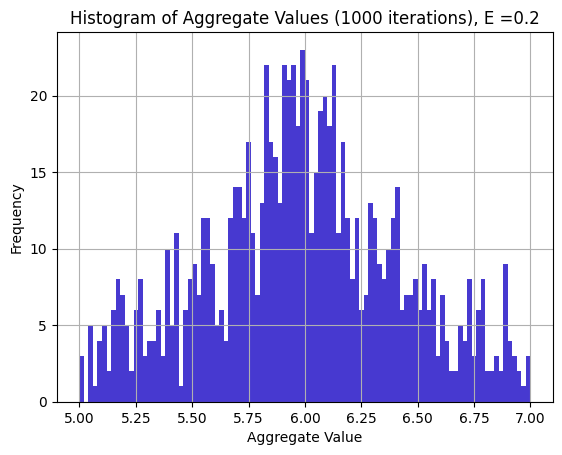

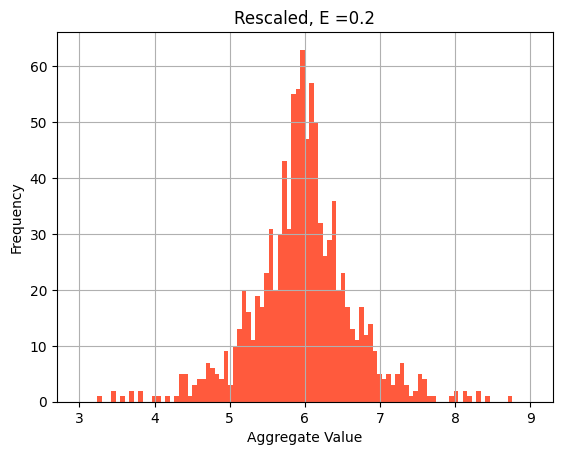

In [3]:
E = 0.2
results = []
lvalues = initiate_lvalues(num_iterations, (b-a)/E)
for ind in range(num_iterations):
    result = SampleAndAggregate(T, L, a, b, lvalues,ind)
    results.append(result)

plt.hist(results, bins=100, range=(5, 7), color = '#4739D0')
plt.xlabel('Aggregate Value')
plt.ylabel('Frequency')
plt.title(f'Histogram of Aggregate Values (1000 iterations), E ={E}')
plt.grid(True)
plt.show()
plt.hist(results, bins=100, range=(3, 9), color= '#FF5A3D')
plt.xlabel('Aggregate Value')
plt.ylabel('Frequency')
plt.title(f'Rescaled, E ={E}')
plt.grid(True)
plt.show()

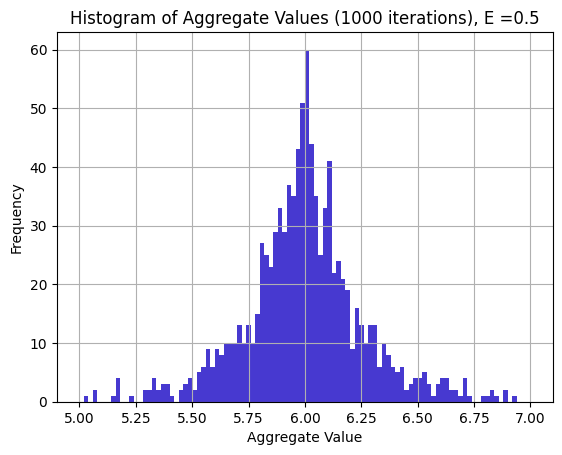

In [4]:
E = 0.5

results = []
lvalues = initiate_lvalues(num_iterations, (b-a)/E)
for ind in range(num_iterations):
    result = SampleAndAggregate(T, L, a, b, lvalues,ind)
    results.append(result)

plt.hist(results, bins=100, range=(5, 7), color = '#4739D0')
plt.xlabel('Aggregate Value')
plt.ylabel('Frequency')
plt.title(f'Histogram of Aggregate Values (1000 iterations), E ={E}')
plt.grid(True)
plt.show()

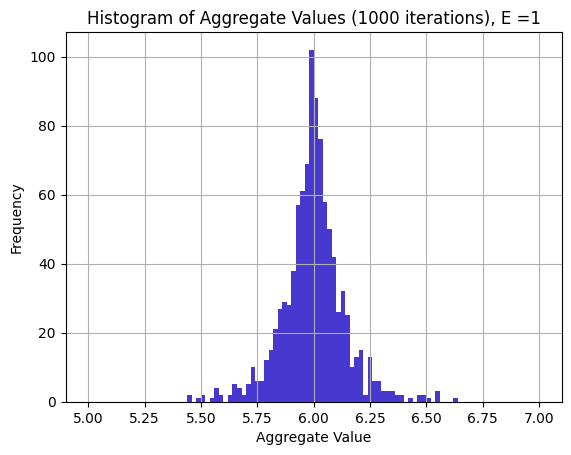

In [5]:
E = 1

results = []
lvalues = initiate_lvalues(num_iterations, (b-a)/E)
for ind in range(num_iterations):
    result = SampleAndAggregate(T, L, a, b, lvalues,ind)
    results.append(result)

plt.hist(results, bins=100, range=(5, 7), color = '#4739D0')
plt.xlabel('Aggregate Value')
plt.ylabel('Frequency')
plt.title(f'Histogram of Aggregate Values (1000 iterations), E ={E}')
plt.grid(True)
plt.show()

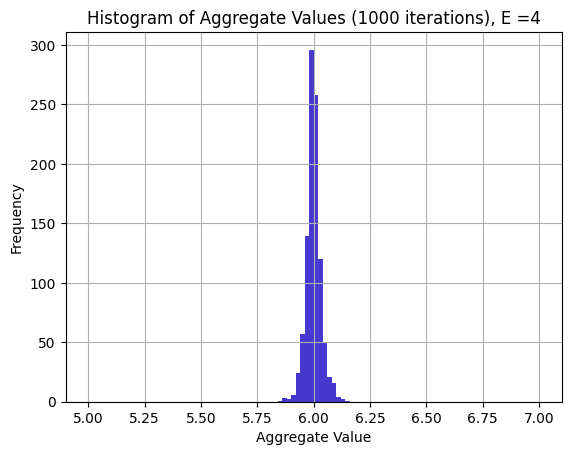

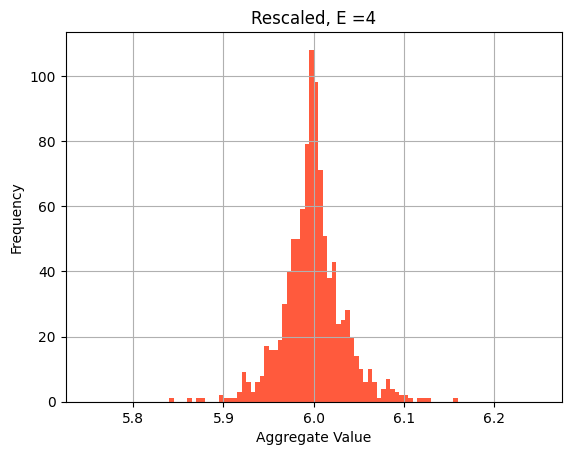

In [10]:
E = 4

results = []
lvalues = initiate_lvalues(num_iterations, (b-a)/E)
for ind in range(num_iterations):
    result = SampleAndAggregate(T, L, a, b, lvalues,ind)
    results.append(result)

plt.hist(results, bins=100, range=(5, 7), color = '#4739D0')
plt.xlabel('Aggregate Value')
plt.ylabel('Frequency')
plt.title(f'Histogram of Aggregate Values (1000 iterations), E ={E}')
plt.grid(True)
plt.show()

plt.hist(results, bins=100, range=(5.75, 6.25), color= '#FF5A3D')
plt.xlabel('Aggregate Value')
plt.ylabel('Frequency')
plt.title(f'Rescaled, E ={E}')
plt.grid(True)
plt.show()

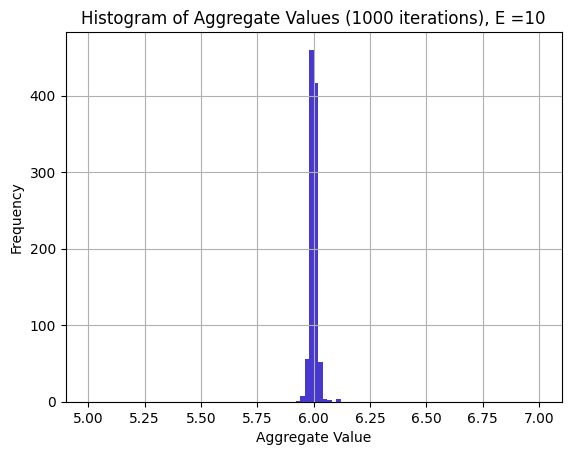

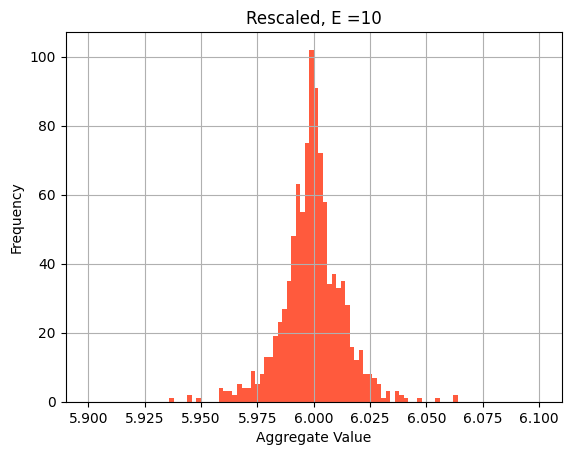

In [7]:
E = 10
results = []
lvalues = initiate_lvalues(num_iterations, (b-a)/E)
for ind in range(num_iterations):
    result = SampleAndAggregate(T, L, a, b, lvalues,ind)
    results.append(result)

plt.hist(results, bins=100, range=(5, 7), color = '#4739D0')
plt.xlabel('Aggregate Value')
plt.ylabel('Frequency')
plt.title(f'Histogram of Aggregate Values (1000 iterations), E ={E}')
plt.grid(True)
plt.show()
plt.hist(results, bins=100, range=(5.9, 6.1), color= '#FF5A3D')
plt.xlabel('Aggregate Value')
plt.ylabel('Frequency')
plt.title(f'Rescaled, E ={E}')
plt.grid(True)
plt.show()